<a href="https://colab.research.google.com/github/sait1801/intelligent_machine_design/blob/main/temperli_cam_dokuman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Texture Analysis of Tempered Glasses

## Content:

1. The problem and the solution
2. Project Requirements
3. Approach:
  * Resizing
  * White/Black Ratios
  * Moment of Images
  * GLCM (grey level co-occurancy method ) Analysis
  * Trying with Novel Data





## The Problem

The tempered or heat strengthened glasses do not have same quality in manufacturing process and there is no integrable quality test method for massive manufacturing

## The Solution

We can use the photoelasticity properties of both general and local regions of the samples. For more information about photoelastic properties of glasses, check here: https://www.sciencedirect.com/science/article/abs/pii/S0143816616300136

## Requirements:
* Image Processing for color spaces, binary filtering, 
* Data analysis, finding the mutual info for distinguishing 
* Clustering algorithm

In [3]:
'''Extracting the photos from zip'''
try:
  !mkdir boraksilikat_resized
  !mkdir front_lid_resized
  !mkdir double_lowe_resized
  !unzip photos.zip
except:
  pass




Archive:  photos.zip
   creating: double_lowe/
  inflating: double_lowe/cam 1.jpg   
  inflating: double_lowe/cam 10.jpg  
  inflating: double_lowe/cam 2.jpg   
  inflating: double_lowe/cam 3.jpg   
  inflating: double_lowe/cam 4.jpg   
  inflating: double_lowe/cam 5.jpg   
  inflating: double_lowe/cam 6.jpg   
  inflating: double_lowe/cam 7.jpg   
  inflating: double_lowe/cam 8.jpg   
  inflating: double_lowe/cam 9.jpg   
  inflating: double_lowe/Thumbs.db   
   creating: front_lid/
  inflating: front_lid/cam 1.jpg     
  inflating: front_lid/cam 10.jpg    
  inflating: front_lid/cam 2.jpg     
  inflating: front_lid/cam 3.jpg     
  inflating: front_lid/cam 4.jpg     
  inflating: front_lid/cam 5.jpg     
  inflating: front_lid/cam 6.jpg     
  inflating: front_lid/cam 7.jpg     
  inflating: front_lid/cam 8.jpg     
  inflating: front_lid/cam 9.jpg     
  inflating: front_lid/Thumbs.db     
   creating: boraksilikat/
  inflating: boraksilikat/cam 1.jpg  
  inflating: boraksilikat/ca

In [4]:
#Importing the necessary libraries
import numpy as np  
from numpy.linalg import matrix_rank as rank
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
from scipy.linalg import orth
import cv2 as cv
import random
import skimage
from skimage import io
from skimage.exposure import histogram

# also import the matrix printing function
!rm bug_numpy_utils.py
!wget https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/bug_numpy_utils.py
from bug_numpy_utils import MatPrint, CData



rm: cannot remove 'bug_numpy_utils.py': No such file or directory
--2023-01-29 10:01:45--  https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/bug_numpy_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14157 (14K) [text/plain]
Saving to: ‘bug_numpy_utils.py’

bug_numpy_utils.py  100%[===================>]  13.83K  --.-KB/s    in 0s      

2023-01-29 10:01:45 (40.7 MB/s) - ‘bug_numpy_utils.py’ saved [14157/14157]



### Resizing the Image

In [5]:
'''resizing part'''
#!/usr/bin/python
boraksilikat_images = []
double_lowe_images = []
front_lid_images = []

names = ['boraksilikat', 'double_lowe', 'front_lid']

for name in names:
  for index in range(10):
    print('/content/'+ name+'/cam ' + str(index+1)+ '.jpg')
    img = cv.imread('/content/'+ name+'/cam ' + str(index+1)+ '.jpg')
    imResize = cv.resize(img, (800,1000), interpolation = cv.INTER_AREA)
    print('/content/'+ str(name)+ '_resized/' + str(index)+ '.jpg')
    cv.imwrite('/content/'+ str(name)+ '_resized/' + str(index)+ '.jpg', imResize)

    imResize = cv.cvtColor(imResize,cv.COLOR_BGR2GRAY)

    if( name == 'boraksilikat'):
      boraksilikat_images.append(imResize)

    elif( name == 'double_lowe'):
      double_lowe_images.append(imResize)

    if( name == 'front_lid'):
      front_lid_images.append(imResize)

/content/boraksilikat/cam 1.jpg
/content/boraksilikat_resized/0.jpg
/content/boraksilikat/cam 2.jpg
/content/boraksilikat_resized/1.jpg
/content/boraksilikat/cam 3.jpg
/content/boraksilikat_resized/2.jpg
/content/boraksilikat/cam 4.jpg
/content/boraksilikat_resized/3.jpg
/content/boraksilikat/cam 5.jpg
/content/boraksilikat_resized/4.jpg
/content/boraksilikat/cam 6.jpg
/content/boraksilikat_resized/5.jpg
/content/boraksilikat/cam 7.jpg
/content/boraksilikat_resized/6.jpg
/content/boraksilikat/cam 8.jpg
/content/boraksilikat_resized/7.jpg
/content/boraksilikat/cam 9.jpg
/content/boraksilikat_resized/8.jpg
/content/boraksilikat/cam 10.jpg
/content/boraksilikat_resized/9.jpg
/content/double_lowe/cam 1.jpg
/content/double_lowe_resized/0.jpg
/content/double_lowe/cam 2.jpg
/content/double_lowe_resized/1.jpg
/content/double_lowe/cam 3.jpg
/content/double_lowe_resized/2.jpg
/content/double_lowe/cam 4.jpg
/content/double_lowe_resized/3.jpg
/content/double_lowe/cam 5.jpg
/content/double_lowe_res

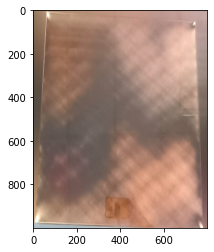

In [6]:
#Sample Glass
img = cv.imread('/content/double_lowe_resized/1.jpg')
imgplot = plt.imshow(img)
plt.show()

## Moment of Images


*   Binarizing
*   Momment centers and normalizing them



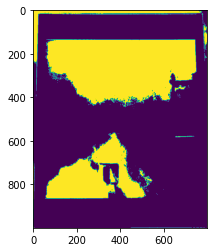

In [7]:
im_gray = cv.imread('/content/boraksilikat_resized/1.jpg', cv.IMREAD_GRAYSCALE)
(thresh, im_bw) = cv.threshold(im_gray, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
thresh = 127
im_bw = cv.threshold(im_gray, thresh, 255, cv.THRESH_BINARY)[1]
plt.imshow(im_bw)
plt.show()

In [8]:
def binarize(glass_index,name ):
  """this binarizes and return a dictionary IN CLASS results"""
  im_gray = cv.imread('/content/' + name + '_resized/'+str(glass_index)+'.jpg', cv.IMREAD_GRAYSCALE)

  (thresh, im_bw) = cv.threshold(im_gray, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
  thresh = 127
  im_bw = cv.threshold(im_gray, thresh, 255, cv.THRESH_BINARY)[1]
  unique, counts = np.unique(im_bw, return_counts=True)
  data_or_b_and_w =dict(zip(unique, counts))
  # print(data_or_b_and_w)
  w_o_b = data_or_b_and_w[0]/data_or_b_and_w[255]
  # print(w_o_b)

  # return dict(zip(glass_index, w_o_b))
  return w_o_b/3.7887846663114986 #bu sayı ortalama beyaz/siyah değeridir ve zamanla dinamik şekilde değişmelidir


In [9]:
'''Finding Moments'''
def moment_x_y(glass_index,name):
  i = cv.imread('/content/' +name +'_resized/'+str(glass_index)+'.jpg')
  img_g = cv.cvtColor(i, cv.COLOR_BGR2GRAY)
  ret,img = cv.threshold(img_g,127,255,0)

  M = cv.moments(img)
  X = int(M["m10"] / M["m00"])
  Y = int(M["m01"] / M["m00"])

  return X,Y ##Later we need to normalize these


In [10]:
import pandas as pd
paths = ['boraksilikat', 'double_lowe', 'front_lid']
# init_data = ['none', 0,0,0,0,0]
columns = ['Type','w/b', 'Cx', 'Cy', 'GLCM correlation', 'GLCM dissimilarity', 'GLCM contrast', 'GLCM ASM', 'GLCM energy', 'GLCM homogeneity']
df1 = df = pd.DataFrame(columns = columns)


for index,name in enumerate(paths):
  for i in range(10):
    w_b = binarize(i,name) 
    X,Y = moment_x_y(i,name)


    df = df.append({'Type': name, 'Cx': X/524, 'Cy': Y/512, 'w/b': w_b} ,ignore_index=True) #512 sebebi max değerin 512 olması


df

,Type,w/b,Cx,Cy,GLCM correlation,GLCM dissimilarity,GLCM contrast,GLCM ASM,GLCM energy,GLCM homogeneity
0,boraksilikat,0.631155,0.696565,0.740234,NaN,NaN,NaN,NaN,NaN,NaN
1,boraksilikat,0.570415,0.704198,0.746094,NaN,NaN,NaN,NaN,NaN,NaN
2,boraksilikat,0.615933,0.736641,0.742188,NaN,NaN,NaN,NaN,NaN,NaN
3,boraksilikat,0.490972,0.765267,0.853516,NaN,NaN,NaN,NaN,NaN,NaN
4,boraksilikat,0.347552,0.744275,0.900391,NaN,NaN,NaN,NaN,NaN,NaN
5,boraksilikat,0.338348,0.824427,0.941406,NaN,NaN,NaN,NaN,NaN,NaN
6,boraksilikat,0.524985,0.870229,0.960938,NaN,NaN,NaN,NaN,NaN,NaN
7,boraksilikat,0.497591,0.872137,0.923828,NaN,NaN,NaN,NaN,NaN,NaN
8,boraksilikat,0.545692,0.883588,0.986328,NaN,NaN,NaN,NaN,NaN,NaN
9,boraksilikat,0.515172,0.858779,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


## GLCM Analysis 

In [11]:
import numpy as np
from skimage.feature import greycomatrix, greycoprops
from skimage import data
from skimage import util, exposure, data
import pywt
from skimage import io
from skimage.color import rgb2gray

# GLCM properties
def contrast_feature(matrix_coocurrence):
    contrast = greycoprops(matrix_coocurrence, 'contrast')
    return contrast

def dissimilarity_feature(matrix_coocurrence):
    dissimilarity = greycoprops(matrix_coocurrence, 'dissimilarity')    
    return dissimilarity

def homogeneity_feature(matrixc_coocurrence):
    homogeneity = greycoprops(matrix_coocurrence, 'homogeneity')
    return homogeneity

def energy_feature(matrix_coocurrence):
    energy = greycoprops(matrix_coocurrence, 'energy')
    return energy

def correlation_feature(matrix_coocurrence):
    correlation = greycoprops(matrix_coocurrence, 'correlation')
    return correlation

def asm_feature(matrix_coocurrence):
    asm = greycoprops(matrix_coocurrence, 'ASM')
    return asm

bins32 = np.array([0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120, 128, 136, 144, 152, 160,
            168, 176, 184, 192, 200, 208, 216, 224, 232, 240, 248, 255]) #32-bit

In [12]:
# open the sample images
boraksilikat_images[0].shape

(1000, 800)

In [13]:
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops

# compute some GLCM properties each patch
xs = []
ys = []
for index,patch in enumerate(boraksilikat_images + double_lowe_images+front_lid_images):
    glcm = greycomatrix(patch, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])
    df['GLCM dissimilarity'][index] = greycoprops(glcm, 'dissimilarity')[0, 0]/4.408682
    df['GLCM correlation'][index] = greycoprops(glcm, 'correlation')[0, 0]/0.988639
    df['GLCM contrast'][index] = greycoprops(glcm, 'contrast')[0, 0]/1
    df['GLCM homogeneity'][index] = greycoprops(glcm, 'homogeneity')[0, 0]/1
    df['GLCM energy'][index] = greycoprops(glcm, 'energy')[0, 0]/1
    df['GLCM ASM'][index] = greycoprops(glcm, 'ASM')[0, 0]/1



print(xs)


<ipython-input-13-14c6da6ee692>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GLCM dissimilarity'][index] = greycoprops(glcm, 'dissimilarity')[0, 0]/4.408682
<ipython-input-13-14c6da6ee692>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GLCM correlation'][index] = greycoprops(glcm, 'correlation')[0, 0]/0.988639
<ipython-input-13-14c6da6ee692>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GLCM contrast'][index] = 

[2.942749685534591, 2.9893496855345916, 2.997037735849057, 2.6817773584905664, 2.8177597484276733, 2.7706691823899368, 2.6278427672955975, 2.3305245283018867, 2.4809194968553463, 2.199488050314466, 3.0218867924528308, 2.8595132075471703, 3.2770716981132098, 3.1602666666666686, 2.837251572327046, 2.5261257861635236, 2.2861157232704414, 2.615474213836478, 3.0626415094339627, 2.982745911949687, 4.408681761006287, 4.220979874213836, 4.003903144654087, 3.741061635220124, 3.8205031446540874, 3.3980817610062894, 3.4389283018867918, 3.8688754716981117, 4.114610062893082, 3.7570138364779893]


In [14]:
df

,Type,w/b,Cx,Cy,GLCM correlation,GLCM dissimilarity,GLCM contrast,GLCM ASM,GLCM energy,GLCM homogeneity
0,boraksilikat,0.631155,0.696565,0.740234,0.992376,0.667490,69.284098,0.000956,0.030917,0.388966
1,boraksilikat,0.570415,0.704198,0.746094,0.987651,0.678060,77.559015,0.000961,0.030994,0.405697
2,boraksilikat,0.615933,0.736641,0.742188,0.989612,0.679804,74.080799,0.000971,0.031158,0.397803
3,boraksilikat,0.490972,0.765267,0.853516,0.983426,0.608295,56.164228,0.001471,0.038353,0.441769
4,boraksilikat,0.347552,0.744275,0.900391,0.985770,0.639139,60.517440,0.001210,0.034788,0.414605
5,boraksilikat,0.338348,0.824427,0.941406,0.985822,0.628457,60.632141,0.001235,0.035138,0.424379
6,boraksilikat,0.524985,0.870229,0.960938,0.985786,0.596061,49.634049,0.001348,0.036721,0.430487
7,boraksilikat,0.497591,0.872137,0.923828,0.991735,0.528622,35.144228,0.001460,0.038204,0.438980
8,boraksilikat,0.545692,0.883588,0.986328,0.986555,0.562735,45.437571,0.001438,0.037925,0.435899
9,boraksilikat,0.515172,0.858779,1.000000,0.993952,0.498899,33.770258,0.001446,0.038032,0.449061


## Modelling the Data In 3D

In [15]:
import plotly.graph_objects as go 
from scipy.interpolate import griddata
from plotly.offline import iplot

#Read data
dataframe_boraksilikat = df[df.Type == 'boraksilikat']
dataframe_double_lowe = df[df.Type == 'double_lowe']
dataframe_front_lid = df[df.Type == 'front_lid']


# create trace 1 that is 3d scatter
trace1 = go.Scatter3d(
    x=dataframe_boraksilikat['w/b'],
    y=dataframe_boraksilikat['GLCM dissimilarity'],
    z=dataframe_boraksilikat['GLCM correlation'],
    mode='markers',
    marker=dict(
        size=5,
        color='rgb(168,160,50)',                # set color to an array/list of desired values      
    ),
    hovertext = 'boraksilikat'

)

trace2 = go.Scatter3d(
    x=dataframe_double_lowe['w/b'],
    y=dataframe_double_lowe['GLCM dissimilarity'],
    z=dataframe_double_lowe['GLCM correlation'],
    mode='markers',
    marker=dict(
        size=5,
        color='rgb(50,168,82)',                # set color to an array/list of desired values      
    ),
    hovertext = 'double_lowe'
)

trace3 = go.Scatter3d(
    x=dataframe_front_lid['w/b'],
    y=dataframe_front_lid['GLCM dissimilarity'],
    z=dataframe_front_lid['GLCM correlation'],
    mode='markers',
    marker=dict(
        size=5,
        color='rgb(147,50,168)',                # set color to an array/list of desired values      
    ),
    hovertext = 'front_lid'

)

data = [trace1,trace2,trace3]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Finding the mutual informations for each type of glass using PCA


In [16]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=9, random_state=2020)
df_for_pca = df.copy()
del df_for_pca["Type"]
pca.fit(df_for_pca)

df_new = pca.transform(df_for_pca)
df_last = pd.DataFrame(df_new, columns = ['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9'])
df_last['Type'] = df['Type']
df_last


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Type
0,2.174504,0.039631,0.194223,-0.064893,0.040569,0.013756,0.001531,-0.000095,-0.000007,boraksilikat
1,10.448889,-0.060084,0.211852,-0.090641,-0.003864,0.003477,-0.000635,-0.001267,-0.000005,boraksilikat
2,6.971016,0.001563,0.187567,-0.056203,-0.007024,0.006279,0.000584,-0.001496,-0.000016,boraksilikat
3,-10.945959,-0.033931,0.057932,-0.108376,0.005254,-0.016767,0.004614,-0.001223,-0.000017,boraksilikat
4,-6.593484,-0.209101,0.051475,-0.123777,0.016823,-0.002708,-0.000830,0.001181,0.000024,boraksilikat
5,-6.478859,-0.219441,-0.016960,-0.111647,-0.042125,-0.003790,-0.002834,0.000145,0.000022,boraksilikat
6,-17.475691,0.019069,-0.101070,-0.074032,-0.015632,-0.006691,-0.000247,-0.002267,-0.000015,boraksilikat
7,-31.965613,0.079475,-0.093199,-0.078390,-0.012898,0.004301,0.002797,-0.001001,-0.000004,boraksilikat
8,-21.672030,0.061944,-0.139482,-0.088172,-0.015396,-0.000543,-0.003190,-0.000811,-0.000008,boraksilikat
9,-33.339429,0.097063,-0.159151,-0.126644,0.013515,0.008473,0.001724,-0.000316,0.000010,boraksilikat


In [17]:
print(pca.explained_variance_ratio_)

[9.99978248e-01 8.28613548e-06 7.54140419e-06 5.00370054e-06
 8.48026608e-07 6.23255432e-08 8.83170929e-09 1.65653746e-09
 3.51476688e-13]


In [18]:
#Read data
dataframe_boraksilikat = df_last[df.Type == 'boraksilikat']
dataframe_double_lowe = df_last[df_last.Type == 'double_lowe']
dataframe_front_lid = df_last[df_last.Type == 'front_lid']


# create trace 1 that is 3d scatter
trace1 = go.Scatter3d(
    x=dataframe_boraksilikat['PC1'],
    y=dataframe_boraksilikat['PC2'],
    z=dataframe_boraksilikat['PC3'],
    mode='markers',
    marker=dict(
        size=5,
        color='rgb(168,160,50)',                # set color to an array/list of desired values      
    ),
    hovertext = 'boraksilikat'

)

trace2 = go.Scatter3d(
    x=dataframe_double_lowe['PC1'],
    y=dataframe_double_lowe['PC2'],
    z=dataframe_double_lowe['PC3'],
    mode='markers',
    marker=dict(
        size=5,
        color='rgb(50,168,82)',                # set color to an array/list of desired values      
    ),
    hovertext = 'double_lowe'
)

trace3 = go.Scatter3d(
    x=dataframe_front_lid['PC1'],
    y=dataframe_front_lid['PC2'],
    z=dataframe_front_lid['PC3'],
    mode='markers',
    marker=dict(
        size=5,
        color='rgb(147,50,168)',                # set color to an array/list of desired values      
    ),
    hovertext = 'front_lid'

)

data = [trace1,trace2,trace3]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## NOTOKAY Glasses

In [19]:
!unzip yorglass.zip
!mkdir yorglass_borasilikat_resized yorglass_double_lowe_resized yorglass_front_lid_resized

Archive:  yorglass.zip
   creating: yorglass_borasilikat/
  inflating: yorglass_borasilikat/1.jpeg  
  inflating: yorglass_borasilikat/2.jpeg  
  inflating: yorglass_borasilikat/3.jpeg  
   creating: yorglass_double_lowe/
  inflating: yorglass_double_lowe/1.jpeg  
  inflating: yorglass_double_lowe/2.jpeg  
  inflating: yorglass_double_lowe/3.jpeg  
   creating: yorglass_front_lid/
  inflating: yorglass_front_lid/1.jpeg  
  inflating: yorglass_front_lid/2.jpeg  
  inflating: yorglass_front_lid/3.jpeg  


In [20]:
'''resizing part'''
#!/usr/bin/python
yorglass_boraksilikat_images = []
yorglass_double_lowe_images = []
yorglass_front_lid_images = []

names = ['borasilikat', 'double_lowe', 'front_lid']

for name in names:
  for index in range(3):
    print('/content/'+ 'yorglass_'+ name +'/'+str(index+1)+ '.jpeg')
    img = cv.imread('/content/'+ 'yorglass_'+ name+'/'+str(index+1)+ '.jpeg')
    imResize = cv.resize(img, (800,1000), interpolation = cv.INTER_AREA)
    print('/content/'+ 'yorglass_'+ str(name)+ '_resized/' + str(index)+ '.jpeg')
    cv.imwrite('/content/'+ 'yorglass_'+ str(name)+ '_resized/' + str(index)+ '.jpeg', imResize)

    imResize = cv.cvtColor(imResize,cv.COLOR_BGR2GRAY)


    if( name == 'borasilikat'):
      yorglass_boraksilikat_images.append(imResize)

    elif( name == 'double_lowe'):
      yorglass_double_lowe_images.append(imResize)

    if( name == 'front_lid'):
      yorglass_front_lid_images.append(imResize)

/content/yorglass_borasilikat/1.jpeg
/content/yorglass_borasilikat_resized/0.jpeg
/content/yorglass_borasilikat/2.jpeg
/content/yorglass_borasilikat_resized/1.jpeg
/content/yorglass_borasilikat/3.jpeg
/content/yorglass_borasilikat_resized/2.jpeg
/content/yorglass_double_lowe/1.jpeg
/content/yorglass_double_lowe_resized/0.jpeg
/content/yorglass_double_lowe/2.jpeg
/content/yorglass_double_lowe_resized/1.jpeg
/content/yorglass_double_lowe/3.jpeg
/content/yorglass_double_lowe_resized/2.jpeg
/content/yorglass_front_lid/1.jpeg
/content/yorglass_front_lid_resized/0.jpeg
/content/yorglass_front_lid/2.jpeg
/content/yorglass_front_lid_resized/1.jpeg
/content/yorglass_front_lid/3.jpeg
/content/yorglass_front_lid_resized/2.jpeg


In [21]:
def binarize_outlier(im_gray ):
  """this binarizes and return a dictionary IN CLASS results"""

  (thresh, im_bw) = cv.threshold(im_gray, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
  thresh = 127
  im_bw = cv.threshold(im_gray, thresh, 255, cv.THRESH_BINARY)[1]
  unique, counts = np.unique(im_bw, return_counts=True)
  data_or_b_and_w =dict(zip(unique, counts))
  w_o_b = data_or_b_and_w[0]/data_or_b_and_w[255]


  return w_o_b/3.7887846663114986 #bu sayı ortalama beyaz/siyah değeridir ve zamanla dinamik şekilde değişmelidir

In [22]:
def moment_x_y_outlier(img_g):
  ret,img = cv.threshold(img_g,127,255,0)

  M = cv.moments(img)
  X = int(M["m10"] / M["m00"])
  Y = int(M["m01"] / M["m00"])

  return X,Y ##Later we need to normalize these

In [23]:
columns = ['Type','w/b', 'Cx', 'Cy', 'GLCM correlation', 'GLCM dissimilarity', 'GLCM contrast', 'GLCM ASM', 'GLCM energy', 'GLCM homogeneity']

df_outlier = pd.DataFrame(columns = columns)
outlier_images = yorglass_boraksilikat_images+yorglass_double_lowe_images+yorglass_front_lid_images
for index,img in enumerate(outlier_images):
  w_b = binarize_outlier(img)
  X,Y = moment_x_y_outlier(img)
  if(index <3):
    df_outlier = df_outlier.append({'Type': 'front_lid_outlier', 'Cx': X/524, 'Cy': Y/512, 'w/b': w_b} ,ignore_index=True) #512 sebebi max değerin 512 olması
  elif (index <6):
    df_outlier = df_outlier.append({'Type': 'double_lowe_outlier', 'Cx': X/524, 'Cy': Y/512, 'w/b': w_b} ,ignore_index=True) #512 sebebi max değerin 512 olması
  else:
    df_outlier = df_outlier.append({'Type': 'borasilikat_outlier', 'Cx': X/524, 'Cy': Y/512, 'w/b': w_b} ,ignore_index=True) #512 sebebi max değerin 512 olması


df_outlier

,Type,w/b,Cx,Cy,GLCM correlation,GLCM dissimilarity,GLCM contrast,GLCM ASM,GLCM energy,GLCM homogeneity
0,front_lid_outlier,4.362274,1.000000,1.769531,NaN,NaN,NaN,NaN,NaN,NaN
1,front_lid_outlier,0.925088,0.967557,1.392578,NaN,NaN,NaN,NaN,NaN,NaN
2,front_lid_outlier,5.168540,0.984733,1.785156,NaN,NaN,NaN,NaN,NaN,NaN
3,double_lowe_outlier,5.222176,0.927481,1.722656,NaN,NaN,NaN,NaN,NaN,NaN
4,double_lowe_outlier,7.697059,0.982824,1.900391,NaN,NaN,NaN,NaN,NaN,NaN
5,double_lowe_outlier,4.326968,1.000000,1.748047,NaN,NaN,NaN,NaN,NaN,NaN
6,borasilikat_outlier,14.883086,1.192748,1.904297,NaN,NaN,NaN,NaN,NaN,NaN
7,borasilikat_outlier,9.996997,1.150763,1.894531,NaN,NaN,NaN,NaN,NaN,NaN
8,borasilikat_outlier,65.637906,1.259542,1.914062,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:

# compute some GLCM properties each patch
xs = []
ys = []
for index,patch in enumerate(outlier_images):
    glcm = greycomatrix(patch, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])
    df_outlier['GLCM dissimilarity'][index] = greycoprops(glcm, 'dissimilarity')[0, 0]/4.408682
    df_outlier['GLCM correlation'][index] = greycoprops(glcm, 'correlation')[0, 0]/0.988639
    df_outlier['GLCM contrast'][index] = greycoprops(glcm, 'contrast')[0, 0]/1
    df_outlier['GLCM homogeneity'][index] = greycoprops(glcm, 'homogeneity')[0, 0]/1
    df_outlier['GLCM energy'][index] = greycoprops(glcm, 'energy')[0, 0]/1
    df_outlier['GLCM ASM'][index] = greycoprops(glcm, 'ASM')[0, 0]/1

print(xs)

[1.4944150943396228, 1.5040289308176105, 1.829251572327044, 1.7269459119496855, 1.6276251572327047, 1.4941672955974845, 1.502906918238994, 1.4167672955974844, 1.4851232704402517]


<ipython-input-24-66ada929debb>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-24-66ada929debb>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-24-66ada929debb>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-24-66ada929debb>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

In [25]:
df_outlier

,Type,w/b,Cx,Cy,GLCM correlation,GLCM dissimilarity,GLCM contrast,GLCM ASM,GLCM energy,GLCM homogeneity
0,front_lid_outlier,4.362274,1.000000,1.769531,1.001584,0.338971,4.541907,0.003566,0.059717,0.485658
1,front_lid_outlier,0.925088,0.967557,1.392578,0.992604,0.341152,6.853737,0.003778,0.061463,0.498731
2,front_lid_outlier,5.168540,0.984733,1.785156,0.974245,0.414920,13.371616,0.003602,0.060020,0.462847
3,double_lowe_outlier,5.222176,0.927481,1.722656,0.996868,0.391715,7.140976,0.002813,0.053039,0.449357
4,double_lowe_outlier,7.697059,0.982824,1.900391,0.994112,0.369186,8.238913,0.003249,0.057001,0.481678
5,double_lowe_outlier,4.326968,1.000000,1.748047,1.002058,0.338915,5.501488,0.003443,0.058674,0.494489
6,borasilikat_outlier,14.883086,1.192748,1.904297,0.994868,0.340897,7.852170,0.003370,0.058051,0.504619
7,borasilikat_outlier,9.996997,1.150763,1.894531,1.004349,0.321358,4.947904,0.003012,0.054880,0.510246
8,borasilikat_outlier,65.637906,1.259542,1.914062,0.993044,0.336863,9.005865,0.003690,0.060746,0.523904


In [26]:
##Converting the outlier data inputs as pca componenets
#PCA
pca = PCA(n_components=9, random_state=2020)
df_outlier_for_pca = df_outlier.copy()
del df_outlier_for_pca["Type"]
pca.fit(df_outlier_for_pca)

df_outlier_new = pca.transform(df_outlier_for_pca)
df_outlier_last = pd.DataFrame(df_outlier_new, columns = ['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9'])
df_outlier_last['Type'] = df_outlier['Type']
df_outlier_last



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Type
0,-8.854587,-2.699776,-0.016614,-0.038393,-0.000514,0.004496,-0.000390,0.000019,1.638506e-18,front_lid_outlier
1,-12.225430,-0.290988,0.340141,0.061852,-0.004960,-0.000641,-0.000189,0.000105,8.360797e-19,front_lid_outlier
2,-7.795203,6.103454,-0.023686,0.007820,-0.000344,0.001089,-0.000291,-0.000166,1.338647e-18,front_lid_outlier
3,-7.920975,-0.125555,0.051295,-0.090045,0.025045,-0.001513,0.000122,0.000025,8.458382e-19,double_lowe_outlier
4,-5.414700,0.900449,-0.123090,-0.069334,-0.017476,-0.001536,-0.000129,0.000263,8.739906e-19,double_lowe_outlier
5,-8.862398,-1.739738,0.003967,-0.021693,-0.011376,-0.000676,0.001098,-0.000261,9.632609e-19,double_lowe_outlier
6,1.758130,0.305925,-0.146733,0.103113,0.009241,0.000737,0.000831,0.000183,1.434021e-18,borasilikat_outlier
7,-3.209464,-2.456722,-0.149618,0.061666,0.001818,-0.002074,-0.000999,-0.000143,4.968196e-19,borasilikat_outlier
8,52.524627,0.002952,0.064339,-0.014986,-0.001435,0.000118,-0.000052,-0.000025,1.123479e-18,borasilikat_outlier


In [27]:
trace4 = go.Scatter3d(
    x=df_outlier_last['PC1'][:3],
    y=df_outlier_last['PC2'][:3],
    z=df_outlier_last['PC3'][:3],
    mode='markers',
    marker=dict(
        size=5,
        color='rgb(204,153,255)',                # set color to an array/list of desired values      
    ),
    hovertext = 'front_lid_outlier'

)

trace5 = go.Scatter3d(
    x=df_outlier_last['PC1'][3:],
    y=df_outlier_last['PC2'][3:],
    z=df_outlier_last['PC3'][3:],
    mode='markers',
    marker=dict(
        size=5,
        color='rgb(153, 255, 204)',                # set color to an array/list of desired values      
    ),
    hovertext = 'double_lowe_outlier'

)

trace6 = go.Scatter3d(
    x=df_outlier_last['PC1'][6:],
    y=df_outlier_last['PC2'][6:],
    z=df_outlier_last['PC3'][6:],
    mode='markers',
    marker=dict(
        size=5,
        color='rgb(255, 255, 153)',                # set color to an array/list of desired values      
    ),
    hovertext = 'borosilikat_outlier'

)

# data = [trace3,trace4] ##only front lids
data = [trace1, trace2,trace3,trace4,trace5,trace6] ##only front lids
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Outlier Detection using Box Visualizing
check out here for more info about Box Visaulizing and IQR thresholding :


*   https://medium.com/swlh/identify-outliers-with-pandas-statsmodels-and-seaborn-2766103bf67c  
* https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/



In [28]:
borosilikat_outlier_indexes = pd.DataFrame()

In [29]:
## IQR calculation to find outlier

def outlier_finding(feature, array):
  q3, q1 = np.percentile(array[feature], [75, 25])
  # print(q3, q1)
  # print(len(array[feature]))
  IQR = q3 - q1
  # print(IQR)

  upper_bound = q3 + 1.5 * IQR
  lower_bound = q1 - 1.5 * IQR
  # print(f"upper_bound:{upper_bound}")
  # print(f"lower_bound:{lower_bound}")

  too_large = array[array[feature]>upper_bound]
  too_small = array[array[feature]<lower_bound]
  print('asdasd')
  concat = pd.concat([too_large,too_small])
  print(concat) ##df

  return concat

In [30]:
combined_borosilikat = pd.concat([df_last[df_last.Type == 'boraksilikat'], df_outlier_last[df_outlier_last.Type == 'borasilikat_outlier']])
combined_borosilikat =combined_borosilikat[['PC1','PC2','PC3']]
# combined_borosilikat.drop('Type', inplace=True, axis=1)
combined_borosilikat

,PC1,PC2,PC3
0,2.174504,0.039631,0.194223
1,10.448889,-0.060084,0.211852
2,6.971016,0.001563,0.187567
3,-10.945959,-0.033931,0.057932
4,-6.593484,-0.209101,0.051475
5,-6.478859,-0.219441,-0.016960
6,-17.475691,0.019069,-0.101070
7,-31.965613,0.079475,-0.093199
8,-21.672030,0.061944,-0.139482
9,-33.339429,0.097063,-0.159151


In [31]:
combined_borosilikat['PC1'].describe

<bound method NDFrame.describe of 0     2.174504
1    10.448889
2     6.971016
3   -10.945959
4    -6.593484
5    -6.478859
6   -17.475691
7   -31.965613
8   -21.672030
9   -33.339429
6     1.758130
7    -3.209464
8    52.524627
Name: PC1, dtype: float64>

In [32]:
borosilikat_outlier_indexes =pd.concat([borosilikat_outlier_indexes,outlier_finding('PC1',combined_borosilikat)])
borosilikat_outlier_indexes

asdasd
         PC1       PC2       PC3
8  52.524627  0.002952  0.064339


,PC1,PC2,PC3
8,52.524627,0.002952,0.064339


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



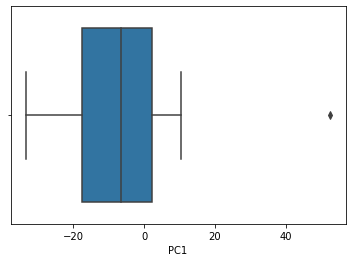

In [33]:
import seaborn as sns
sns.boxplot(combined_borosilikat['PC1'])

In [34]:
combined_borosilikat['PC2'].describe


<bound method NDFrame.describe of 0    0.039631
1   -0.060084
2    0.001563
3   -0.033931
4   -0.209101
5   -0.219441
6    0.019069
7    0.079475
8    0.061944
9    0.097063
6    0.305925
7   -2.456722
8    0.002952
Name: PC2, dtype: float64>

In [35]:
borosilikat_outlier_indexes =pd.concat([borosilikat_outlier_indexes,outlier_finding('PC2',combined_borosilikat)])
borosilikat_outlier_indexes

asdasd
        PC1       PC2       PC3
6  1.758130  0.305925 -0.146733
7 -3.209464 -2.456722 -0.149618


,PC1,PC2,PC3
8,52.524627,0.002952,0.064339
6,1.758130,0.305925,-0.146733
7,-3.209464,-2.456722,-0.149618


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



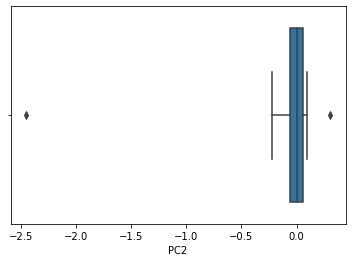

In [36]:
sns.boxplot(combined_borosilikat['PC2'])


In [37]:
combined_borosilikat['PC3'].describe

<bound method NDFrame.describe of 0    0.194223
1    0.211852
2    0.187567
3    0.057932
4    0.051475
5   -0.016960
6   -0.101070
7   -0.093199
8   -0.139482
9   -0.159151
6   -0.146733
7   -0.149618
8    0.064339
Name: PC3, dtype: float64>

In [38]:
borosilikat_outlier_indexes =pd.concat([borosilikat_outlier_indexes,outlier_finding('PC3',combined_borosilikat)])
borosilikat_outlier_indexes

asdasd
Empty DataFrame
Columns: [PC1, PC2, PC3]
Index: []


,PC1,PC2,PC3
8,52.524627,0.002952,0.064339
6,1.758130,0.305925,-0.146733
7,-3.209464,-2.456722,-0.149618


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



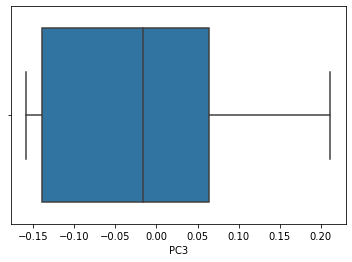

In [39]:
sns.boxplot(combined_borosilikat['PC3'])


## Safety Decision
If the sample has high stress or related distribution, it would be dangerous to use it in oven assembles. However if the samples are somehow near to other types of clusters, then they might be used for other purposes and the samples would be saved insted of being discarded

In [40]:
kmeans_df = df.copy()
kmeans_df.drop('Type',axis='columns', inplace=True)

In [41]:
##Safety decision making
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(kmeans_df)

In [42]:
y_clusters

array([2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1], dtype=int32)

In [49]:
## And also check for high abnormality : if any feautre of outlier is bigger than 3xmean. It is not safe
safe = borosilikat_outlier_indexes[np.abs(borosilikat_outlier_indexes.PC1) < 3*np.mean(np.abs(combined_borosilikat.PC1))]
not_safe = borosilikat_outlier_indexes[np.abs(borosilikat_outlier_indexes.PC1) > 3*np.mean(np.abs(combined_borosilikat.PC1))]



In [52]:
safe

,PC1,PC2,PC3
6,1.758130,0.305925,-0.146733
7,-3.209464,-2.456722,-0.149618


In [51]:
not_safe

,PC1,PC2,PC3
8,52.524627,0.002952,0.064339


##Update the global variables so that the next prediction will be based on what is learned in the past

In [54]:
df = pd.concat([df_last,df_outlier_last])
df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Type
0,2.174504,0.039631,0.194223,-0.064893,0.040569,0.013756,0.001531,-0.000095,-6.824156e-06,boraksilikat
1,10.448889,-0.060084,0.211852,-0.090641,-0.003864,0.003477,-0.000635,-0.001267,-4.605224e-06,boraksilikat
2,6.971016,0.001563,0.187567,-0.056203,-0.007024,0.006279,0.000584,-0.001496,-1.620323e-05,boraksilikat
3,-10.945959,-0.033931,0.057932,-0.108376,0.005254,-0.016767,0.004614,-0.001223,-1.699667e-05,boraksilikat
4,-6.593484,-0.209101,0.051475,-0.123777,0.016823,-0.002708,-0.000830,0.001181,2.375264e-05,boraksilikat
5,-6.478859,-0.219441,-0.016960,-0.111647,-0.042125,-0.003790,-0.002834,0.000145,2.188225e-05,boraksilikat
6,-17.475691,0.019069,-0.101070,-0.074032,-0.015632,-0.006691,-0.000247,-0.002267,-1.523027e-05,boraksilikat
7,-31.965613,0.079475,-0.093199,-0.078390,-0.012898,0.004301,0.002797,-0.001001,-4.150411e-06,boraksilikat
8,-21.672030,0.061944,-0.139482,-0.088172,-0.015396,-0.000543,-0.003190,-0.000811,-7.902660e-06,boraksilikat
9,-33.339429,0.097063,-0.159151,-0.126644,0.013515,0.008473,0.001724,-0.000316,9.606408e-06,boraksilikat


## Possible Enhancement Methods:


*   Local region scanning for local defects (CNN) 
*   Data augmentation 
*   Boosting methods like XGBOOST, Catboost etc..

